# Name : Fernando I.A.M.D.
# Index No.: 190172K

In [1]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Q1

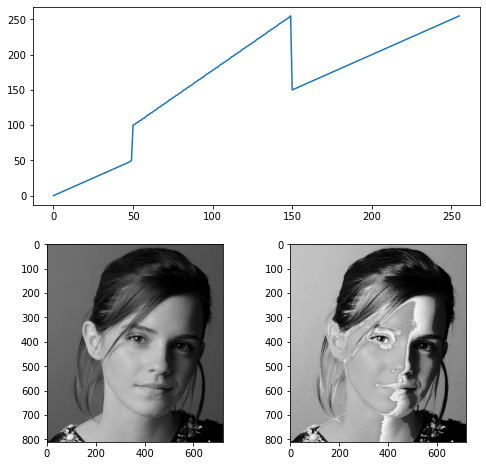

In [2]:
img = cv2.imread("emma_gray.jpg",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8,8))
ax = plt.subplot(gs[0, :]) # row 0, col 0
plt.plot(t)

ax = plt.subplot(gs[1, 0]) # row 0, col 1
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

ax = plt.subplot(gs[1, 1]) # row 1, span all columns
plt.imshow(g)
plt.show()

## Q2

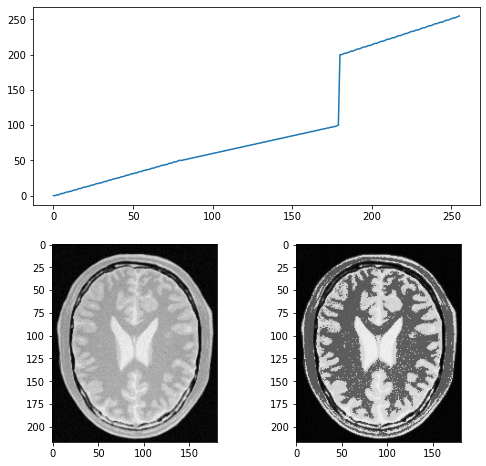

In [3]:
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,80)
t2 = np.linspace(50,100,100)
t3 = np.linspace(200,255,76)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8,8))
ax = plt.subplot(gs[0, :]) # row 0, col 0
plt.plot(t)

ax = plt.subplot(gs[1, 0]) # row 0, col 1
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

ax = plt.subplot(gs[1, 1]) # row 1, span all columns
plt.imshow(g)

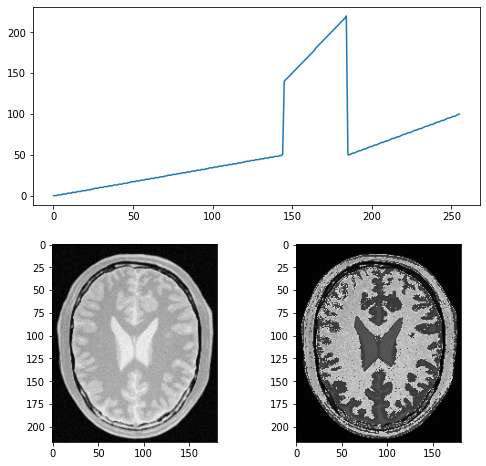

In [4]:
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,145)
t2 = np.linspace(140,220,40)
t3 = np.linspace(50,100,71)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)

g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8,8))
ax = plt.subplot(gs[0, :]) 
plt.plot(t)

ax = plt.subplot(gs[1, 0])
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

ax = plt.subplot(gs[1, 1])
plt.imshow(g)

## Q3

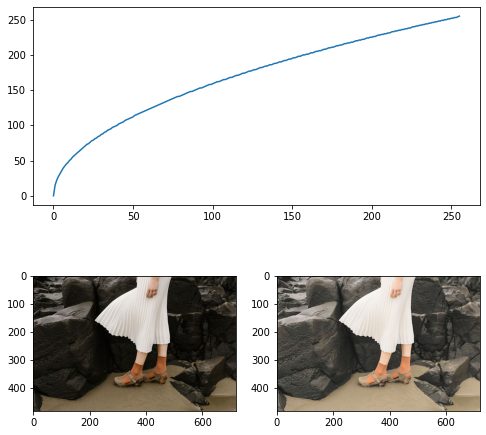

In [5]:
img = cv2.imread("highlights_and_shadows.jpg")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_Lab = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
L,a,b = cv2.split(img_Lab)


gamma = 0.5

t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype("uint8")
transformed_L = cv2.LUT(L,t)

img_L_Increased = cv2.merge([transformed_L,a,b])
img_L_Increased = cv2.cvtColor(img_L_Increased,cv2.COLOR_Lab2RGB)

gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(8,8))
ax = plt.subplot(gs[0, :]) # row 0, col 0
plt.plot(t)

ax = plt.subplot(gs[1, 0]) # row 0, col 1
plt.imshow(img_RGB)

ax = plt.subplot(gs[1, 1]) # row 1, span all columns
plt.imshow(img_L_Increased)




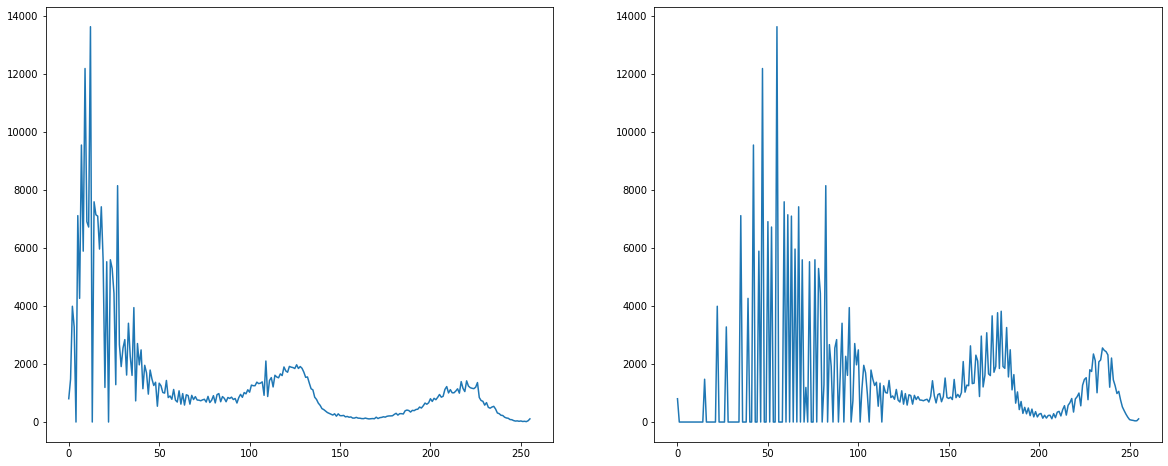

In [6]:
hist_f = cv2.calcHist([L],[0],None,[256],[0,256])
hist_g = cv2.calcHist([transformed_L],[0],None,[256],[0,256])

fig, ax  = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(hist_f)
ax[1].plot(hist_g)

## Q4

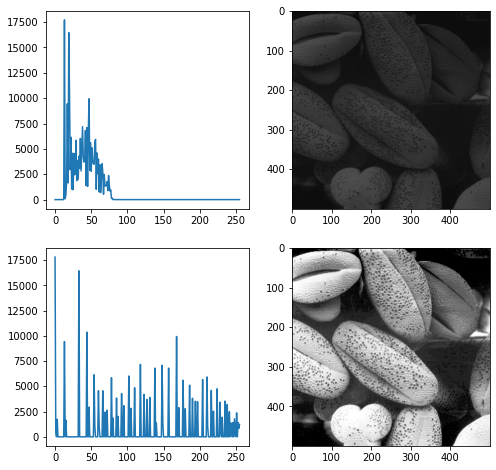

In [7]:
img1 = cv2.imread("shells.png",cv2.IMREAD_GRAYSCALE)

hist_f = cv2.calcHist([img1],[0],None,[256],[0,256])
g = cv2.equalizeHist(img1)
hist_g = cv2.calcHist([g],[0],None,[256],[0,256])


fig, ax  = plt.subplots(2,2,figsize = (8,8))
ax[0][0].plot(hist_f)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
ax[0][1].imshow(img1)

ax[1][0].plot(hist_g)
g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
ax[1][1].imshow(g)

## Q5

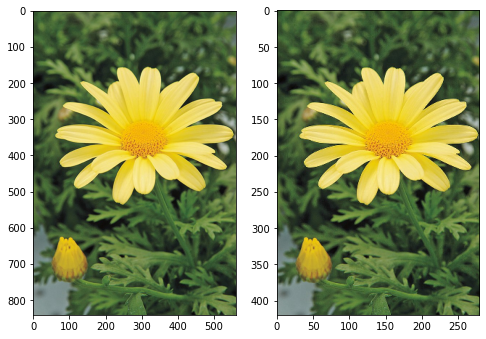

In [31]:
img = cv2.imread("daisy.jpg")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


scale = 0.5
rows = int(scale*img.shape[0])
cols = int(scale*img.shape[1])

zoomed = np.zeros((rows,cols,3),dtype=img.dtype)

for i in range(0,rows):
    for j in range(0,cols):
        for k in range(0,3):
            zoomed[i,j,k] = img[int(round(i/scale)),int(round(j/scale)),k]

zoomed_RGB = cv2.cvtColor(zoomed,cv2.COLOR_BGR2RGB)


fig, ax  = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(img_RGB)
ax[1].imshow(zoomed_RGB)
